In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
df1=pd.read_csv("D:\ResaleFlatPrices\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df2=pd.read_csv("D:\ResaleFlatPrices\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df3=pd.read_csv("D:\ResaleFlatPrices\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df4=pd.read_csv("D:\ResaleFlatPrices\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df5=pd.read_csv("D:\ResaleFlatPrices\Resale flat prices based on registration date from Jan-2017 onwards.csv")


In [190]:
df = pd.concat([df1, df2,df3,df4,df5], ignore_index=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941006 entries, 0 to 941005
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                941006 non-null  object 
 1   town                 941006 non-null  object 
 2   flat_type            941006 non-null  object 
 3   block                941006 non-null  object 
 4   street_name          941006 non-null  object 
 5   storey_range         941006 non-null  object 
 6   floor_area_sqm       941006 non-null  float64
 7   flat_model           941006 non-null  object 
 8   lease_commence_date  941006 non-null  int64  
 9   resale_price         941006 non-null  float64
 10  remaining_lease      231956 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 79.0+ MB


In [191]:

for i in df.columns:
  print(f"{i}:{df[i].nunique()}")

month:419
town:27
flat_type:8
block:2729
street_name:588
storey_range:25
floor_area_sqm:218
flat_model:34
lease_commence_date:56
resale_price:9735
remaining_lease:730


In [137]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [192]:
df.month.value_counts

<bound method IndexOpsMixin.value_counts of 0         1990-01
1         1990-01
2         1990-01
3         1990-01
4         1990-01
           ...   
941001    2024-11
941002    2024-11
941003    2024-11
941004    2024-11
941005    2024-11
Name: month, Length: 941006, dtype: object>

In [193]:
df.drop_duplicates().shape

(939101, 11)

In [140]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [141]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [142]:
df["block"] = pd.to_numeric(df["block"], errors='coerce') 
df["floor_area_sqm"] = pd.to_numeric(df["floor_area_sqm"], errors='coerce')
df['month'] = pd.to_datetime(df['month'])

In [143]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [144]:
df.town.value_counts()

town
TAMPINES           80906
YISHUN             70960
JURONG WEST        67634
BEDOK              67293
WOODLANDS          66551
ANG MO KIO         52635
HOUGANG            51455
BUKIT BATOK        45275
CHOA CHU KANG      38971
BUKIT MERAH        34875
SENGKANG           33570
PASIR RIS          33553
TOA PAYOH          31956
QUEENSTOWN         29139
GEYLANG            28544
CLEMENTI           28316
BUKIT PANJANG      28132
KALLANG/WHAMPOA    27695
JURONG EAST        25068
SERANGOON          23037
PUNGGOL            21694
BISHAN             21463
SEMBAWANG          14332
MARINE PARADE       8109
CENTRAL AREA        7231
BUKIT TIMAH         2548
LIM CHU KANG          64
Name: count, dtype: int64

In [112]:
df.shape

(941006, 11)

In [145]:
df.flat_type.value_counts()

flat_type
4 ROOM              358294
3 ROOM              299357
5 ROOM              198713
EXECUTIVE            70561
2 ROOM               12226
1 ROOM                1310
MULTI GENERATION       279
MULTI-GENERATION       266
Name: count, dtype: int64

In [146]:

df["flat_type"]=df["flat_type"].replace({"MULTI GENERATION" :"MULTI-GENERATION"})


In [147]:
df["flat_model"]=df["flat_model"].replace({"NEW GENERATION":"New Generation"})

In [148]:
df['storey_avg'] = df['storey_range'].str.split(' TO ').apply(lambda x: (int(x[0]) + int(x[1])) / 2)


In [149]:
df.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                         float64
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
storey_avg                    float64
dtype: object

In [87]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_avg
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,11.0
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,5.0
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,11.0
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,8.0
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,5.0


In [150]:
df['remaining_lease'].unique()

array([nan, 70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58,
       94, 71, 68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55,
       57, 93, 83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49,
       48, '61 years 04 months', '60 years 07 months',
       '62 years 05 months', '62 years 01 month', '63 years',
       '61 years 06 months', '58 years 04 months', '59 years 08 months',
       '59 years 06 months', '60 years', '62 years 08 months', '61 years',
       '60 years 10 months', '59 years 03 months', '61 years 05 months',
       '60 years 04 months', '62 years', '60 years 03 months',
       '63 years 09 months', '61 years 01 month', '61 years 10 months',
       '58 years 06 months', '59 years 04 months', '62 years 11 months',
       '60 years 08 months', '93 years 08 months', '93 years 07 months',
       '60 years 01 month', '94 years 08 months', '78 years 04 months',
       '60 years 06 months', '62 years 06 months', '58 years',
       '70 years 08 mont

In [151]:
def convert_age_to_months(age):
    if pd.isnull(age):  # Handle NaN
        return np.nan
    if isinstance(age, (int, float)):  # Already numeric
        return age
    if isinstance(age, str):  # Convert "X years Y months"
        parts = age.split()
        years = int(parts[0]) if "years" in parts else 0
        months = int(parts[-2]) if "months" in parts else 0
        return years * 12 + months
    return np.nan

# Apply the conversion to the data
converted_data = np.array([convert_age_to_months(item) for item in df['remaining_lease']])

# Convert to a DataFrame while ensuring valid indices
# Reset index to handle NaN properly

df['remaining_lease_months']=converted_data


In [152]:
current_year = pd.Timestamp.now().year
df['remaining_lease_month'] = (99 * 12) - ((current_year - df['lease_commence_date']) * 12)

In [153]:
df['filled_release_months'] = np.where(
    pd.isna(df['remaining_lease_months']),  # Check for NaN
    df['remaining_lease_month'],           # Replace NaN with calculated values
    df['remaining_lease_months']           # Keep existing values
)

In [154]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_avg,remaining_lease_months,remaining_lease_month,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,11.0,NaN,624,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,5.0,NaN,624,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,11.0,NaN,624,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,8.0,NaN,624,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,5.0,NaN,612,612.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941001,2024-11-01,YISHUN,5 ROOM,NaN,YISHUN ST 31,07 TO 09,112.0,Improved,2015,700000.0,90 years 01 month,8.0,1080.0,1080,1080.0
941002,2024-11-01,YISHUN,5 ROOM,NaN,YISHUN ST 51,10 TO 12,113.0,Improved,2017,720000.0,91 years 10 months,11.0,1102.0,1104,1102.0
941003,2024-11-01,YISHUN,5 ROOM,850.0,YISHUN ST 81,01 TO 03,122.0,Improved,1988,670000.0,62 years 09 months,2.0,753.0,756,753.0
941004,2024-11-01,YISHUN,EXECUTIVE,405.0,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,855500.0,62 years 10 months,5.0,754.0,756,754.0


In [155]:
df.isna().sum()

month                          0
town                           0
flat_type                      0
block                     130120
street_name                    0
storey_range                   0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
remaining_lease           709050
storey_avg                     0
remaining_lease_months    709050
remaining_lease_month          0
filled_release_months          0
dtype: int64

In [156]:
df.lease_commence_date.unique

<bound method Series.unique of 0         1977
1         1977
2         1977
3         1977
4         1976
          ... 
941001    2015
941002    2017
941003    1988
941004    1988
941005    1987
Name: lease_commence_date, Length: 941006, dtype: int64>

In [157]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_avg,remaining_lease_months,remaining_lease_month,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,11.0,NaN,624,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,5.0,NaN,624,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,11.0,NaN,624,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,8.0,NaN,624,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,5.0,NaN,612,612.0


In [158]:
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_avg,remaining_lease_months,remaining_lease_month,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,11.0,NaN,624,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,5.0,NaN,624,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,11.0,NaN,624,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,8.0,NaN,624,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,5.0,NaN,612,612.0


In [159]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
month,941006,2006-11-23 07:01:29.146296576,1990-01-01 00:00:00,1999-02-01 00:00:00,2005-07-01 00:00:00,2014-10-01 00:00:00,2024-11-01 00:00:00,NaN
block,810886.0,337.813851,1.0,121.0,280.0,526.0,980.0,254.045665
floor_area_sqm,941006.0,95.686737,28.0,73.0,93.0,113.0,366.7,25.801368
lease_commence_date,941006.0,1988.421007,1966.0,1981.0,1986.0,1996.0,2021.0,10.808054
resale_price,941006.0,325215.347161,5000.0,195000.0,300000.0,422000.0,1588000.0,174629.306966
storey_avg,941006.0,7.704683,2.0,5.0,8.0,11.0,50.0,4.840788
remaining_lease_months,231956.0,762.580856,48.0,680.0,825.0,1002.0,1173.0,338.146883
remaining_lease_month,941006.0,761.052083,492.0,672.0,732.0,852.0,1152.0,129.696649
filled_release_months,941006.0,741.002681,48.0,660.0,732.0,852.0,1173.0,190.145624


In [160]:
# # Drop unnecessary columns
df = df.drop(['block', 'street_name','remaining_lease','remaining_lease_months','remaining_lease_month'], axis=1)

# # Handle missing values in the target variable
# df = df.dropna(subset=['resale_price'])



In [161]:
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,11.0,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,5.0,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,11.0,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,8.0,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,New Generation,1976,47200.0,5.0,612.0


In [162]:
df12=df.copy()

In [165]:
df = df.drop(['storey_range'], axis=1)

In [167]:
df12

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
0,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,11.0,624.0
1,1990-01-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,5.0,624.0
2,1990-01-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,11.0,624.0
3,1990-01-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,8.0,624.0
4,1990-01-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,New Generation,1976,47200.0,5.0,612.0
...,...,...,...,...,...,...,...,...,...,...
941001,2024-11-01,YISHUN,5 ROOM,07 TO 09,112.0,Improved,2015,700000.0,8.0,1080.0
941002,2024-11-01,YISHUN,5 ROOM,10 TO 12,113.0,Improved,2017,720000.0,11.0,1102.0
941003,2024-11-01,YISHUN,5 ROOM,01 TO 03,122.0,Improved,1988,670000.0,2.0,753.0
941004,2024-11-01,YISHUN,EXECUTIVE,04 TO 06,148.0,Maisonette,1988,855500.0,5.0,754.0


In [166]:
df12.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,storey_avg,filled_release_months
count,941006,941006.000000,941006.000000,9.410060e+05,941006.000000,941006.000000
mean,2006-11-23 07:01:29.146296576,95.686737,1988.421007,3.252153e+05,7.704683,741.002681
min,1990-01-01 00:00:00,28.000000,1966.000000,5.000000e+03,2.000000,48.000000
25%,1999-02-01 00:00:00,73.000000,1981.000000,1.950000e+05,5.000000,660.000000
50%,2005-07-01 00:00:00,93.000000,1986.000000,3.000000e+05,8.000000,732.000000
75%,2014-10-01 00:00:00,113.000000,1996.000000,4.220000e+05,11.000000,852.000000
max,2024-11-01 00:00:00,366.700000,2021.000000,1.588000e+06,50.000000,1173.000000
std,NaN,25.801368,10.808054,1.746293e+05,4.840788,190.145624


In [169]:

# # Encode categorical columns
df['town'] = df['town'].astype('category').cat.codes
df['flat_type'] = df['flat_type'].astype('category').cat.codes
df['flat_model'] = df['flat_model'].astype('category').cat.codes

In [170]:
df.describe()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
count,941006,941006.000000,941006.000000,941006.000000,941006.000000,941006.000000,9.410060e+05,941006.000000,941006.000000
mean,2006-11-23 07:01:29.146296576,13.664241,3.014592,95.686737,15.438064,1988.421007,3.252153e+05,7.704683,741.002681
min,1990-01-01 00:00:00,0.000000,0.000000,28.000000,0.000000,1966.000000,5.000000e+03,2.000000,48.000000
25%,1999-02-01 00:00:00,5.000000,2.000000,73.000000,9.000000,1981.000000,1.950000e+05,5.000000,660.000000
50%,2005-07-01 00:00:00,13.000000,3.000000,93.000000,16.000000,1986.000000,3.000000e+05,8.000000,732.000000
75%,2014-10-01 00:00:00,23.000000,4.000000,113.000000,20.000000,1996.000000,4.220000e+05,11.000000,852.000000
max,2024-11-01 00:00:00,26.000000,6.000000,366.700000,32.000000,2021.000000,1.588000e+06,50.000000,1173.000000
std,NaN,8.789594,0.948016,25.801368,6.319369,10.808054,1.746293e+05,4.840788,190.145624


#Outlier

In [35]:
df.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
0,1990-01-01,0,0,31.0,7,1977,9000.0,11.0,624.0
1,1990-01-01,0,0,31.0,7,1977,6000.0,5.0,624.0
2,1990-01-01,0,0,31.0,7,1977,8000.0,11.0,624.0
3,1990-01-01,0,0,31.0,7,1977,6000.0,8.0,624.0
4,1990-01-01,0,2,73.0,20,1976,47200.0,5.0,612.0


In [186]:
sorted(df['storey_avg'].unique())

[np.float64(2.0),
 np.float64(3.0),
 np.float64(5.0),
 np.float64(8.0),
 np.float64(11.0),
 np.float64(13.0),
 np.float64(14.0),
 np.float64(17.0),
 np.float64(18.0),
 np.float64(20.0),
 np.float64(23.0),
 np.float64(26.0),
 np.float64(28.0),
 np.float64(29.0),
 np.float64(32.0),
 np.float64(33.0),
 np.float64(35.0),
 np.float64(38.0),
 np.float64(41.0),
 np.float64(44.0),
 np.float64(47.0),
 np.float64(50.0)]

In [187]:
sorted(df12['storey_range'].unique())

['01 TO 03',
 '01 TO 05',
 '04 TO 06',
 '06 TO 10',
 '07 TO 09',
 '10 TO 12',
 '11 TO 15',
 '13 TO 15',
 '16 TO 18',
 '16 TO 20',
 '19 TO 21',
 '21 TO 25',
 '22 TO 24',
 '25 TO 27',
 '26 TO 30',
 '28 TO 30',
 '31 TO 33',
 '31 TO 35',
 '34 TO 36',
 '36 TO 40',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

In [ ]:
'ANG MO KIO': 0
'BEDOK': 1
'BISHAN': 2
'BUKIT BATOK': 3
'BUKIT MERAH': 4
'BUKIT PANJANG': 5
'BUKIT TIMAH': 6
'CENTRAL AREA': 7
'CHOA CHU KANG': 8
'CLEMENTI': 9
'GEYLANG': 10
'HOUGANG': 11
'JURONG EAST': 12
'JURONG WEST': 13
'KALLANG/WHAMPOA': 14
'MARINE PARADE': 15
'PASIR RIS': 16
'PUNGGOL': 17
'QUEENSTOWN': 18
'SEMBAWANG': 19
'SENGKANG': 20
'SERANGOON': 21
'TAMPINES': 22
'TOA PAYOH': 23
'WOODLANDS': 24
'YISHUN': 25


In [36]:
df.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'storey_avg',
       'filled_release_months'],
      dtype='object')

In [172]:

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [173]:
outlier(df, "floor_area_sqm")
outlier(df, "resale_price")


In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    sns.boxplot(y=df)
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    # Create a boxplot for the specified column
    sns.boxplot(y=df[column])

    # Set the title for the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

    # Show the plot
    plt.show()

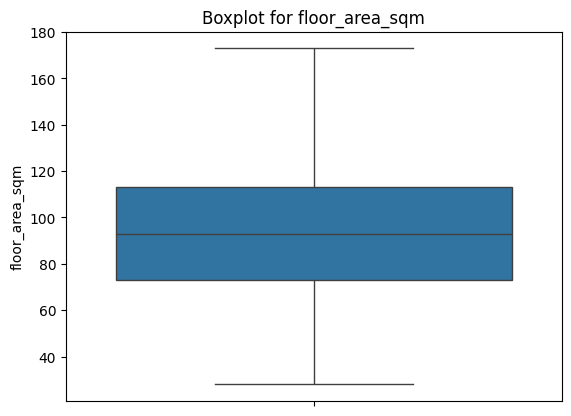

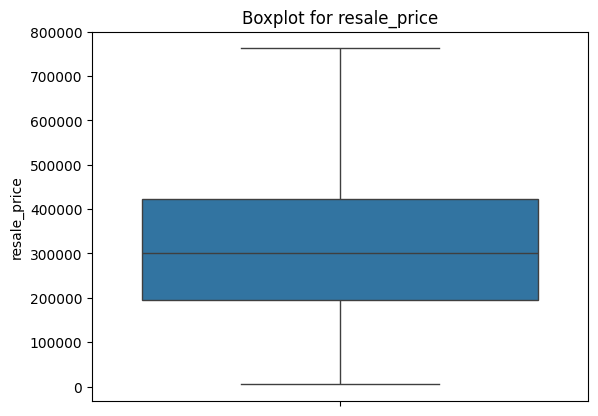

In [175]:
box(df, "floor_area_sqm")
box(df, 'resale_price')  # For example, to plot the boxplot of 'quantity tons'


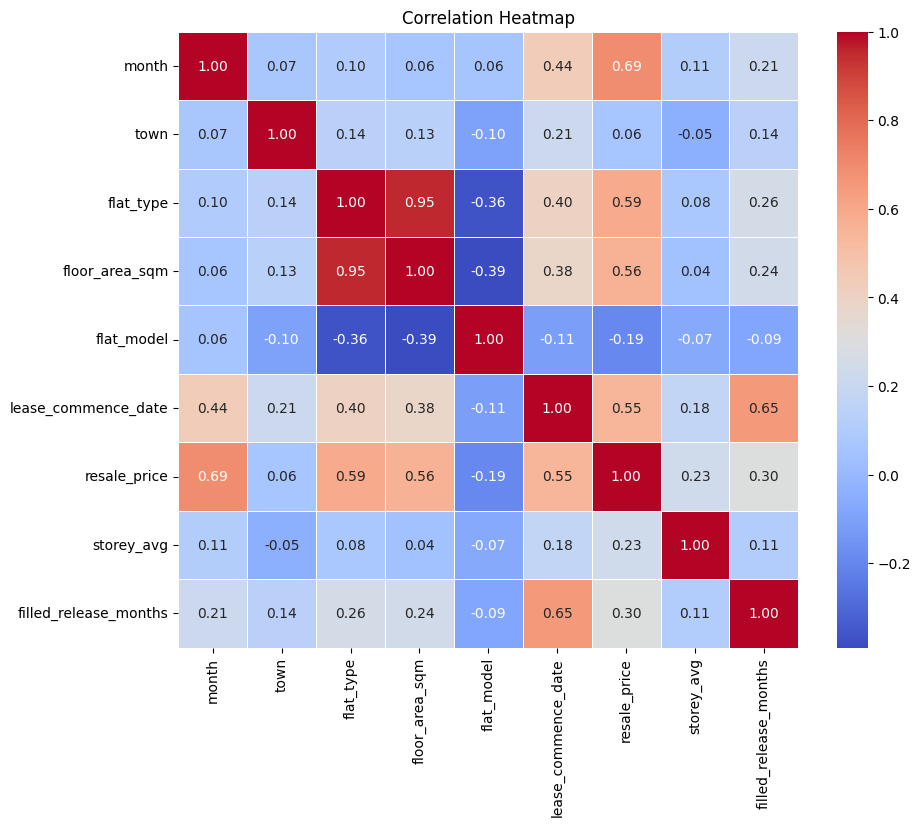

In [41]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Title and Show Plot
plt.title("Correlation Heatmap")
plt.show()

In [42]:
df11=df.copy()
df11

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months
0,1990-01-01,0,0,31.0,7,1977,9000.0,11.0,624.0
1,1990-01-01,0,0,31.0,7,1977,6000.0,5.0,624.0
2,1990-01-01,0,0,31.0,7,1977,8000.0,11.0,624.0
3,1990-01-01,0,0,31.0,7,1977,6000.0,8.0,624.0
4,1990-01-01,0,2,73.0,20,1976,47200.0,5.0,612.0
...,...,...,...,...,...,...,...,...,...
941001,2024-11-01,26,4,112.0,9,2015,700000.0,8.0,1080.0
941002,2024-11-01,26,4,113.0,9,2017,720000.0,11.0,1102.0
941003,2024-11-01,26,4,122.0,9,1988,670000.0,2.0,753.0
941004,2024-11-01,26,5,148.0,15,1988,762500.0,5.0,754.0


In [177]:
df11.describe()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months,year
count,929611.000000,929611.000000,929611.000000,929611.000000,929611.000000,929611.000000,929611.000000,929611.000000,929611.000000,929611.000000
mean,6.578049,13.664256,3.018357,95.766356,15.427680,1988.431704,323459.178736,7.708168,740.982140,2006.482603
std,3.401190,8.777478,0.948728,25.718506,6.322756,10.804146,166062.772387,4.843472,190.475323,9.493585
min,1.000000,0.000000,0.000000,28.000000,0.000000,1966.000000,5000.000000,2.000000,48.000000,1990.000000
25%,4.000000,5.000000,2.000000,73.000000,9.000000,1981.000000,196000.000000,5.000000,660.000000,1999.000000
50%,7.000000,13.000000,3.000000,93.000000,16.000000,1986.000000,300000.000000,8.000000,732.000000,2005.000000
75%,10.000000,23.000000,4.000000,113.000000,20.000000,1996.000000,423000.000000,11.000000,852.000000,2014.000000
max,12.000000,26.000000,6.000000,173.000000,32.000000,2021.000000,762500.000000,50.000000,1173.000000,2024.000000


In [44]:
df11=df11.drop_duplicates()

In [45]:
df11.isna().sum()

month                    0
town                     0
flat_type                0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
storey_avg               0
filled_release_months    0
dtype: int64

In [46]:
df11.dtypes

month                    datetime64[ns]
town                               int8
flat_type                          int8
floor_area_sqm                  float64
flat_model                         int8
lease_commence_date               int64
resale_price                    float64
storey_avg                      float64
filled_release_months           float64
dtype: object

In [47]:

df11['year'] = df11['month'].dt.year
df11['month'] = df11['month'].dt.month

C:\Users\SUBBULASKSHMI S\AppData\Local\Temp\ipykernel_1256\680787323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['year'] = df11['month'].dt.year
C:\Users\SUBBULASKSHMI S\AppData\Local\Temp\ipykernel_1256\680787323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['month'] = df11['month'].dt.month


In [48]:
df11

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months,year
0,1,0,0,31.0,7,1977,9000.0,11.0,624.0,1990
1,1,0,0,31.0,7,1977,6000.0,5.0,624.0,1990
2,1,0,0,31.0,7,1977,8000.0,11.0,624.0,1990
3,1,0,0,31.0,7,1977,6000.0,8.0,624.0,1990
4,1,0,2,73.0,20,1976,47200.0,5.0,612.0,1990
...,...,...,...,...,...,...,...,...,...,...
941001,11,26,4,112.0,9,2015,700000.0,8.0,1080.0,2024
941002,11,26,4,113.0,9,2017,720000.0,11.0,1102.0,2024
941003,11,26,4,122.0,9,1988,670000.0,2.0,753.0,2024
941004,11,26,5,148.0,15,1988,762500.0,5.0,754.0,2024


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [50]:
X = df11.drop(columns=['resale_price'])
y = df11.loc[:, 'resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((697208, 9), (232403, 9), (697208,), (232403,))

In [51]:
# #standardize the features of a dataset
# encoder = StandardScaler()

# encoder.fit_transform(X)

In [52]:
RFR = RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 
RFR.fit(X_train,y_train)

y_pred_train = RFR.predict(X_train)
y_pred_test = RFR.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 828745769.7225243
Mean Absolute Error: 19586.65189061806
Root Mean Squared Error: 28787.944867991606
0.9698927543373073


In [53]:
LR = LinearRegression()

# fitting the model: 
LR.fit(X_train,y_train)

y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 5945109701.355777
Mean Absolute Error: 59093.21975896749
Root Mean Squared Error: 77104.53748876117
0.7840219705371106


In [54]:
DTR = DecisionTreeRegressor()

# fitting the model: 
DTR.fit(X_train,y_train)

y_pred_train = DTR.predict(X_train)
y_pred_test = DTR.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 1004972828.6416202
Mean Absolute Error: 20850.28597078435
Root Mean Squared Error: 31701.3064185314
0.9634906566746338


In [55]:
from sklearn.model_selection import cross_val_score

for depth in range(1,30):
  DTR = DecisionTreeRegressor(max_depth = depth)
  DTR.fit(X_train, y_train)
  train_score = DTR.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(DTR, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.4308978354010049, Cross-ValScore: 0.43088187281149304
Depth - 2, TrainScore: 0.651959324494424, Cross-ValScore: 0.6519487994235967
Depth - 3, TrainScore: 0.7364745788626432, Cross-ValScore: 0.7364601446379091
Depth - 4, TrainScore: 0.8033787069417062, Cross-ValScore: 0.8033656394372534
Depth - 5, TrainScore: 0.8361144579904327, Cross-ValScore: 0.8360602643618289
Depth - 6, TrainScore: 0.8584316492258657, Cross-ValScore: 0.8583097708050422
Depth - 7, TrainScore: 0.8757865330013148, Cross-ValScore: 0.8754053235760265
Depth - 8, TrainScore: 0.8917745195953273, Cross-ValScore: 0.8905547769189381
Depth - 9, TrainScore: 0.9046613385103643, Cross-ValScore: 0.9031897709917294
Depth - 10, TrainScore: 0.916171104054774, Cross-ValScore: 0.9148315775927557
Depth - 11, TrainScore: 0.9268702937831619, Cross-ValScore: 0.9248891645933645
Depth - 12, TrainScore: 0.9355557084191441, Cross-ValScore: 0.932931503202693
Depth - 13, TrainScore: 0.9440827933582772, Cross-ValScore: 0.9

In [56]:
model = DecisionTreeRegressor(random_state=42, max_depth=23)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
train_score 

0.9907539627372611

In [57]:
model.predict(X_test)

array([166250.        , 200000.        , 762500.        , ...,
       281000.        , 523223.85714286, 163993.83458647])

                 Feature  Importance
8                   year    0.550473
3         floor_area_sqm    0.262553
2              flat_type    0.062100
1                   town    0.058332
5    lease_commence_date    0.030732
6             storey_avg    0.012636
4             flat_model    0.009254
7  filled_release_months    0.007807
0                  month    0.006113


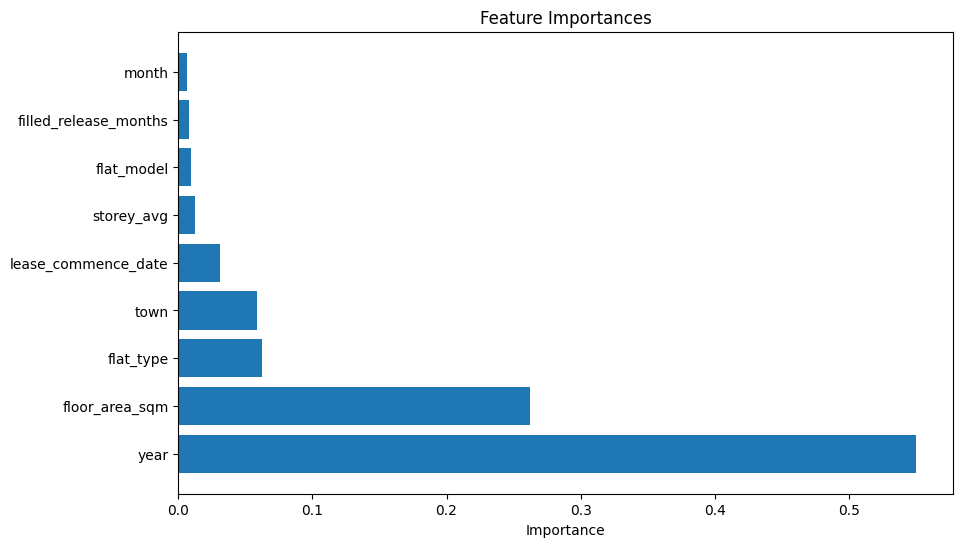

In [58]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [64]:
#Save the regression model by using pickle

import pickle

# Save the trained model to a file
with open('trained_Regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [168]:
import pickle

# Save the trained model to a file
with open('trained_Regression_df_model.pkl', 'wb') as file:
    pickle.dump(df12, file)

In [60]:
model.predict(X)

array([  8500.,   6000.,   8500., ..., 670000., 762500., 762500.])

In [61]:
# 1. Predict values
predictions = model.predict(X_test)  # Replace `X_test` with the input DataFrame

# 2. Create a DataFrame with original and predicted values
df_comparison = X_test.copy()  # Copy the input features for context
df_comparison['Original'] = y_test.values  # Add the original target values
df_comparison['Predicted'] = predictions  # Add the predicted values

# Display the DataFrame
df_comparison


,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,storey_avg,filled_release_months,year,Original,Predicted
70625,6,1,3,92.0,20,1980,2.0,660.0,1994,155000.0,166250.000000
422155,11,26,3,88.0,27,1988,11.0,756.0,2003,175000.0,200000.000000
861614,12,16,4,117.0,28,1977,11.0,648.0,2021,762500.0,762500.000000
49124,8,23,2,69.0,7,1985,2.0,720.0,1993,58000.0,68866.666667
323404,1,13,2,67.0,9,1971,5.0,552.0,2001,94000.0,85712.121212
...,...,...,...,...,...,...,...,...,...,...,...
743970,11,10,2,64.0,28,1968,11.0,516.0,2014,305000.0,290000.000000
717694,3,25,4,122.0,9,1998,2.0,876.0,2013,451000.0,466000.000000
687951,9,3,2,73.0,16,1986,8.0,68.0,2016,285000.0,281000.000000
834714,1,11,3,92.0,22,2016,11.0,1131.0,2021,525000.0,523223.857143


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'Original' contains the true values and 'Predicted' contains the model's predictions
y_true = df_comparison['Original']
y_pred = df_comparison['Predicted']

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


MAE: 19608.814898604087
MSE: 916495441.3537968
RMSE: 30273.675715938374
R2: 0.9667049239831229


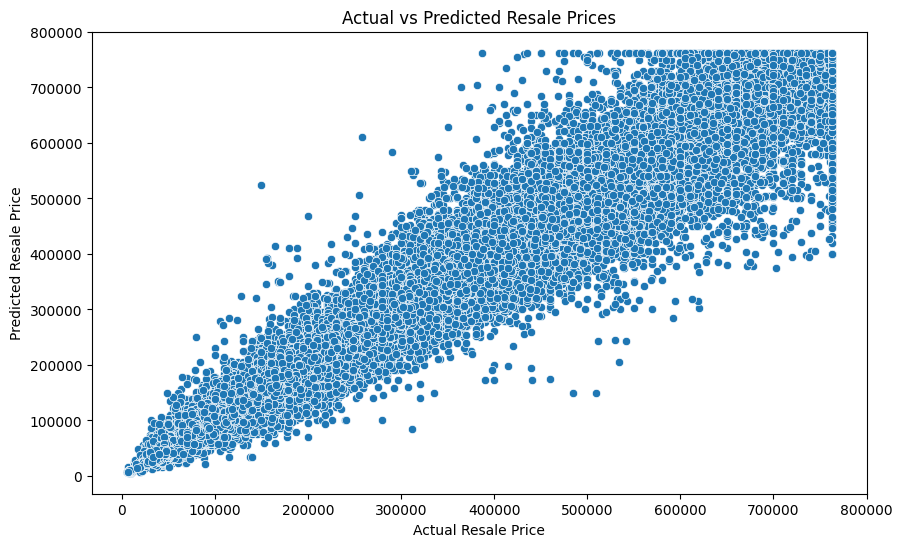

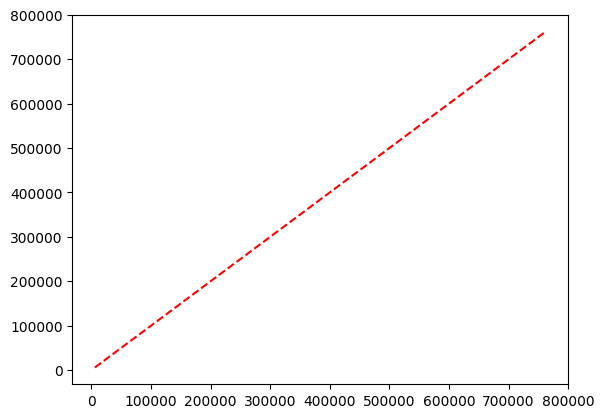

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_true, y=y_pred)
plt.title('Actual vs Predicted Resale Prices')
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.show()

# Optionally, add a line of perfect prediction (45-degree line)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.show()


In [65]:
df11

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_avg,filled_release_months,year
0,1,0,0,31.0,7,1977,9000.0,11.0,624.0,1990
1,1,0,0,31.0,7,1977,6000.0,5.0,624.0,1990
2,1,0,0,31.0,7,1977,8000.0,11.0,624.0,1990
3,1,0,0,31.0,7,1977,6000.0,8.0,624.0,1990
4,1,0,2,73.0,20,1976,47200.0,5.0,612.0,1990
...,...,...,...,...,...,...,...,...,...,...
941001,11,26,4,112.0,9,2015,700000.0,8.0,1080.0,2024
941002,11,26,4,113.0,9,2017,720000.0,11.0,1102.0,2024
941003,11,26,4,122.0,9,1988,670000.0,2.0,753.0,2024
941004,11,26,5,148.0,15,1988,762500.0,5.0,754.0,2024
